Question - 1

In [16]:
import numpy as np 
import pandas as pd
import nltk
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

text = ["India is the land of a different variety of religions and castes with its own features and attributes. Indians believe that they are fortunate to have rich traditions and culture. It is believed that Indian cultures are from ancient times. India has been deeply attached to its roots of the old cultures. The advancement in India can be seen in medicine, mathematics, science, technology, architecture, and many more. India is a huge combination having 29 states and seven union territories across all the four directions. India is the only country where Islam, Buddhism, Hinduism, Sikhism, Christianity and many other religions exist. Every religion in India has its own tradition and festival- for example, Holi, Diwali, Eid, guru Parav, Christmas, and many more. India is rich in traditional aspects by saying Namaste or Namaskar to greet anybody. Also, touching feet of elders is one of the Indian cultures in greeting. The food and eating habits of India changes from state to state in India. However, India has its own specific food style and eating style."]

# split the text into sentences using .split() method
sentences = []
for i in text:
    sentences.append(i.split("."))
    
# flatten the list of lists
sentences = [item for sublist in sentences for item in sublist]

# remove empty strings
sentences = [x for x in sentences if x != '']

# remove extra spaces
sentences = [x.strip() for x in sentences]

# convert to lower case
sentences = [x.lower() for x in sentences]

# remove stopwords

stop_words = set(stopwords.words('english'))
filtered_sentences = []
for i in sentences:
    word_tokens = word_tokenize(i)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentences.append(filtered_sentence)
    
# lemmatize the words
lemmatizer = WordNetLemmatizer()
lemmatized_sentences = []
for i in filtered_sentences:
    lemmatized_sentence = [lemmatizer.lemmatize(w) for w in i]
    lemmatized_sentences.append(lemmatized_sentence)

# stem the words
stemmer = PorterStemmer()
stemmed_sentences = []
for i in lemmatized_sentences:
    stemmed_sentence = [stemmer.stem(w) for w in i]
    stemmed_sentences.append(stemmed_sentence)

# remove punctuation
tokenizer = RegexpTokenizer(r'\w+')
tokenized_sentences = []
for i in stemmed_sentences:
    tokenized_sentence = tokenizer.tokenize(' '.join(i))
    tokenized_sentences.append(tokenized_sentence)

# create a dictionary of words and their frequencies
word_freq = {}
for i in tokenized_sentences:
    for token in i:
        if token not in word_freq.keys():
            word_freq[token] = 1
        else:
            word_freq[token] += 1

# find the maximum frequency
max_freq = max(word_freq.values())

# divide each frequency by the maximum frequency
for word in word_freq.keys():
    word_freq[word] = (word_freq[word]/max_freq)
    
# calculate sentence scores
sentence_scores = defaultdict(int)
for sent in tokenized_sentences:
    for word in sent:
        if len(sent) < 30:
            if word not in sentence_scores.keys():
                sentence_scores[word] = word_freq[word]
            else:
                sentence_scores[word] += word_freq[word]

# find the 5 sentences with the highest scores
import heapq
summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)

# print the summary
summary = ' '.join(summary_sentences)

print(summary)

ModuleNotFoundError: No module named 'nltk'

Question - 2

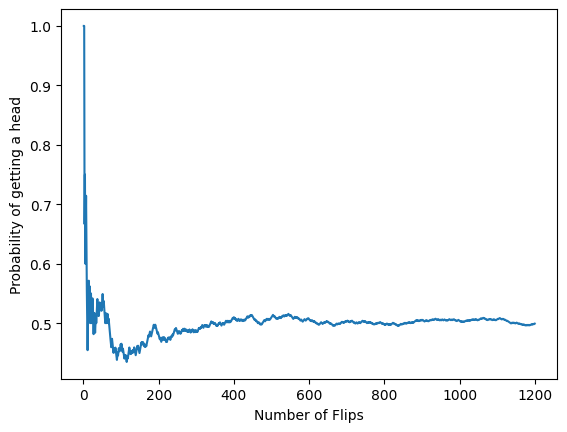

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

seed = (60)

def toss_coin():
    np.random.seed(seed)
    toss = []
    for i in range(1200):
        toss.append(random.randint(0,1))
    return toss

def plot_prob():
    np.random.seed(seed)
    toss = toss_coin()
    prob = []
    for i in range(1,1201):
        prob.append(sum(toss[:i])/i)
    plt.plot(range(1,1201),prob)
    plt.xlabel('Number of Flips')
    plt.ylabel('Probability of getting a head')
    plt.show()

plot_prob()

Question - 3